In [2]:
import torch
import torchvision
from torchvision import datasets,transforms
from torch.autograd import Variable

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
data_train=datasets.MNIST('./data',transform=transform,train=True)
data_test=datasets.MNIST('./data',transform=transform,train=False)



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
from torch.utils.data.dataloader import DataLoader


data_loader_train=DataLoader(dataset=data_train,batch_size=64,shuffle=True)
data_loader_test=DataLoader(dataset=data_test,batch_size=64,shuffle=True)


In [5]:
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32,3,1,1)
        self.conv2=nn.Conv2d(32,64,3,1,1)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(64*7*7,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,10)
        self.dropout = nn.Dropout(0.5)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,64*7*7)
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.fc3(x)
        return x
net=CNN()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [4]:

train_loss = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
for epoch in range(3):
    running_loss = 0.0
    for i,data in enumerate(data_loader_train,0):#0是下標起始位置預設為0
        # data 的格式[[inputs, labels]]       
#         inputs,labels = data
        inputs,labels = data[0].to(device), data[1].to(device)
        #初始為0，清除上個batch的梯度訊息
        optimizer.zero_grad()         
        #前向+後向+優化
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

    
        running_loss += loss.item()
        if i%100 == 99:
            PATH = './mnist_net.pth'
            torch.save(net.state_dict(), PATH)#保存訓練結果

            print('[%d,%5d] loss :%.3f' %
                 (epoch+1,i+1,running_loss/100))
            running_loss = 0.0
        train_loss.append(loss.item())



[1,  100] loss :1.839
[1,  200] loss :0.762
[1,  300] loss :0.511
[1,  400] loss :0.373
[1,  500] loss :0.311
[1,  600] loss :0.275
[1,  700] loss :0.223
[1,  800] loss :0.217
[1,  900] loss :0.192
[2,  100] loss :0.177
[2,  200] loss :0.159
[2,  300] loss :0.160
[2,  400] loss :0.134
[2,  500] loss :0.129
[2,  600] loss :0.121
[2,  700] loss :0.118
[2,  800] loss :0.112
[2,  900] loss :0.124
[3,  100] loss :0.105
[3,  200] loss :0.102
[3,  300] loss :0.100
[3,  400] loss :0.094
[3,  500] loss :0.095
[3,  600] loss :0.077
[3,  700] loss :0.090
[3,  800] loss :0.085
[3,  900] loss :0.084


In [11]:
test_net=CNN()#利用test data測試訓練成果
PATH = './mnist_net.pth'
test_net.load_state_dict(torch.load(PATH))

total=0
correct=0
with torch.no_grad():
    for i,data in enumerate(data_loader_test,0):
        input,label=data
        test_out=test_net(input)
        _,predicted=torch.max(test_out.data,dim=1)
        total+=label.size(0)
        correct+=(predicted==label).sum().item()
print('Accuracy of the network on the  test images: ',float(100*correct/total),'%')

Accuracy of the network on the  test images:  97.62 %


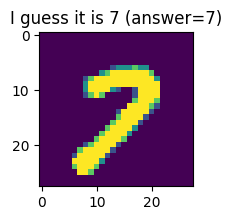

In [78]:
from matplotlib import pyplot as plt
import random
show_test=datasets.MNIST('./data',train=False)
#test data測試訓練成果--2
net=CNN()
PATH = './mnist_net.pth'
net.load_state_dict(torch.load(PATH))

fig=plt.figure(figsize=(2,2))
x=random.randint(0,9999)
transform=torchvision.transforms.ToTensor()
image=transform(show_test[x][0])
output=net(image)
_,predicted=torch.max(output.data,dim=1)

plt.title("I guess it is {} (answer={})".format(predicted.item(),show_test[x][1]))
plt.imshow(show_test[x][0])
plt.show()


 

In [1]:
import cv2#手繪圖測試——1(不要亂用，用來改圖片格式)
img_path="./drawToTest/1.png"
image=cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_invert=cv2.bitwise_not(gray)
print(gray_invert.shape)
cv2.imwrite(img_path,gray_invert)

(28, 28)


True

In [10]:
import PIL.Image#手繪圖測試——2
net=CNN()
PATH = './mnist_net.pth'

net.load_state_dict(torch.load(PATH))
with torch.no_grad():
    for x in range(10):
        img_path="./drawToTest/{}.png".format(x)
        image=PIL.Image.open(img_path)
        transform=torchvision.transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
        image=transform(image)
        print(image.shape)
        output=net(image)
        _,predicted=torch.max(output.data,dim=1)
        print(predicted)


torch.Size([1, 28, 28])
tensor([0])
torch.Size([1, 28, 28])
tensor([1])
torch.Size([1, 28, 28])
tensor([2])
torch.Size([1, 28, 28])
tensor([3])
torch.Size([1, 28, 28])
tensor([1])
torch.Size([1, 28, 28])
tensor([5])
torch.Size([1, 28, 28])
tensor([6])
torch.Size([1, 28, 28])
tensor([7])
torch.Size([1, 28, 28])
tensor([3])
torch.Size([1, 28, 28])
tensor([7])
